# PUBG Finish Placement Prediction

A model which predicts players' finishing placement based on their final stats, on a scale from 1 (first place) to 0 (last place). 

<img src="Images/1.jpg" alt="drawing" width="800px"/>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("train_V2.csv")
df.columns = ['Id','groupId','matchId','assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills','killStreaks','longestKill','matchDuration','matchType','maxPlace','numGroups','rankPoints','revives','rideDistance','roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints','winPlacePerc']

In [3]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


## A description of the attributes

- groupId - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- DBNOs - Number of enemy players knocked.
- headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- kills - Number of enemy players killed.
- killStreaks - Max number of enemy players killed in a short amount of time.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- numGroups - Number of groups we have data for in the match.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.



# Preprocessing

## Illegal Match

In [5]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

As it can be seen that the attribute 'winPlacePrec' has a single null value.

In [6]:
index = df[df['winPlacePerc'].isnull()].index.tolist()
df.loc[index, 'numGroups']

2744604    1
Name: numGroups, dtype: int64

It can be seen that this match has only one player. This can be thought of an illegal match and hence we remove this row.

<img src="Images/2.png" alt="drawing" width="800px"/>

In [7]:
df.drop(index, inplace=True)
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

## Kills without Moving, Extreme number of Kills and Headshot Kills

<img src="Images/9.jpg" alt="drawing" width="800px"/>

In [ ]:
df['killswithoutmoving'] = ((df['totaldistance']==0) & (df['kills'] > 0))
print(df[df['killswithoutmoving'] == True].shape)
df.drop(df[df['killswithoutmoving'] == True].index, inplace=True)

In [ ]:
print(df[df['kills'] > 40].shape)
df.drop(df[df['kills'] > 40].index, inplace=True)

In [ ]:
print(df[(df['headshotKills']/df['kills'] == 1) & (df['kills'] > 12)].shape)
df.drop(df[(df['headshotKills']/df['kills'] == 1) & (df['kills'] > 12)].index, inplace=True)

## Only swimming and still winning

<img src="Images/10.jpg" alt="drawing" width="800px"/>

In [ ]:
df['totaldistance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']
print(df[(df['totaldistance'] == df['swimDistance'])&(df['winPlacePerc'] > 0.80)].shape)
df.drop(df[(df['totaldistance'] == df['swimDistance'])&(df['winPlacePerc'] > 0.80)].index, inplace=True)

## Excessive Weapons Acquired

<img src="Images/11.png" alt="drawing" width="800px"/>

In [ ]:
print(df[df['weaponsAcquired'] > 50].shape)
df.drop(df[df['weaponsAcquired'] > 50].index, inplace=True)

## Excessive Revivals

<img src="Images/12.jpg" alt="drawing" width="800px"/>

In [ ]:
print(df[df['heals'] > 35].shape)
df.drop(df[df['heals'] > 35].index, inplace=True)

## A general outlier detection

In [ ]:
print(df[(df['weaponsAcquired'] > 35) & (df['totaldistance'] == 0)].shape)
df.drop(df[(df['weaponsAcquired'] > 35) & (df['totaldistance'] == 0)].index, inplace=True)

In [ ]:
print(df[(df['weaponsAcquired'] > 30) & (df['totaldistance'] < 50) & (df.kills > 30)].shape)
df.drop(df[(df['weaponsAcquired'] > 30) & (df['totaldistance'] < 50) & (df.kills > 30)].index, inplace=True)

In [ ]:
print(df[df.longestKill > 950].shape)
df.drop(df[df['longestKill'] > 950].index, inplace=True)

# Exploratory Data Analysis

### Kills, Players knocked down and Assists

<img src="Images/6.jpg" alt="drawing" width="800px"/>

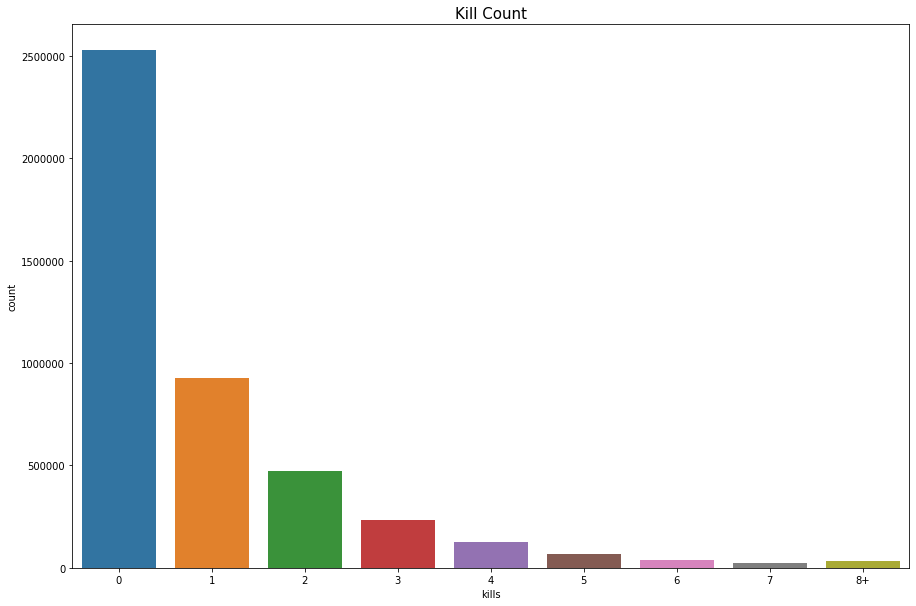

In [8]:
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

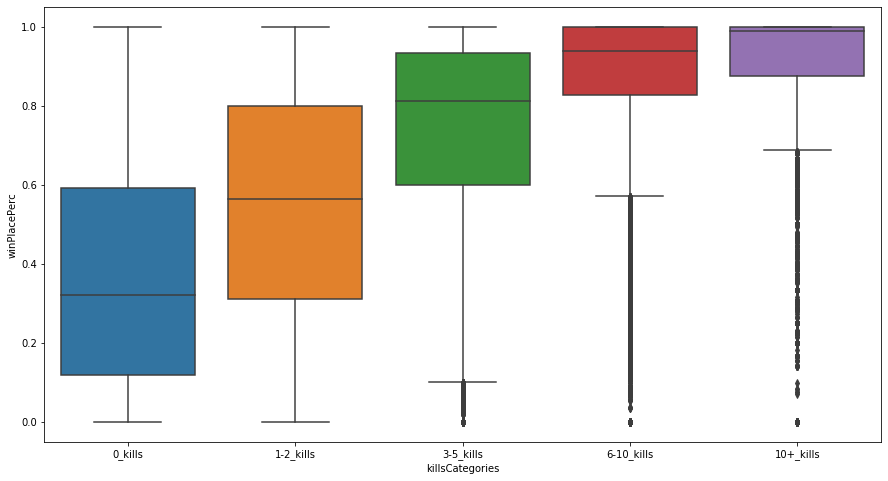

In [9]:
kills = df.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

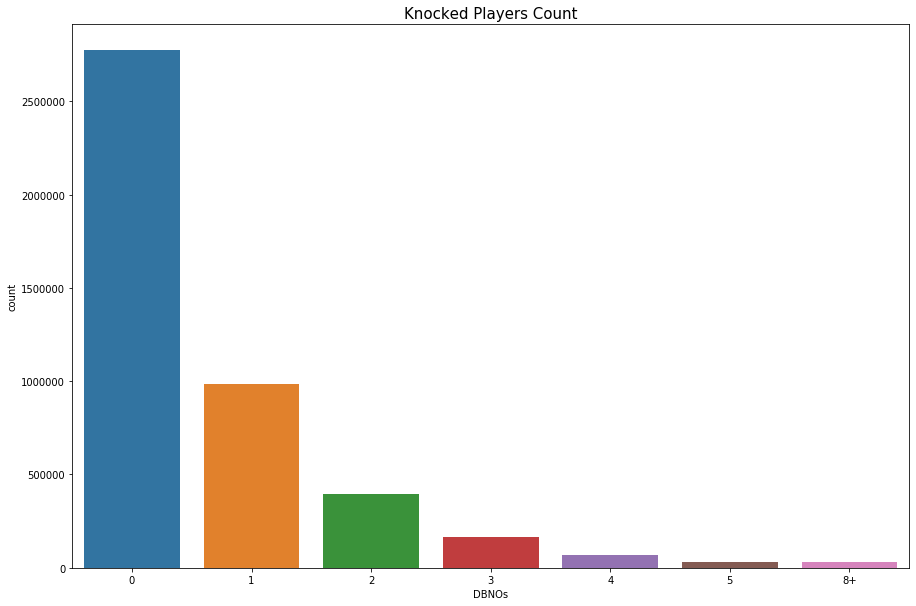

In [10]:
data = df.copy()
data.loc[data['DBNOs'] > data['DBNOs'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['DBNOs'].astype('str').sort_values())
plt.title("Knocked Players Count",fontsize=15)
plt.show()

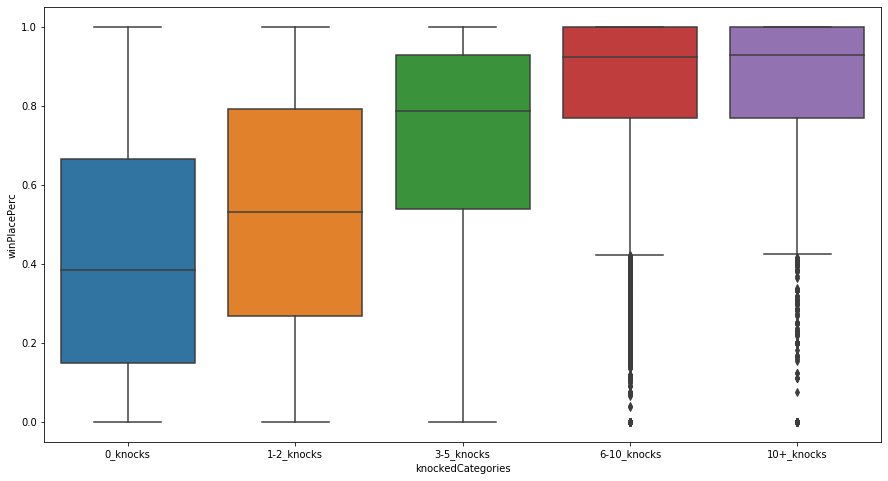

In [11]:
knocked = df.copy()

knocked['knockedCategories'] = pd.cut(knocked['DBNOs'], [-1, 0, 2, 5, 10, 60], labels=['0_knocks','1-2_knocks', '3-5_knocks', '6-10_knocks', '10+_knocks'])

plt.figure(figsize=(15,8))
sns.boxplot(x="knockedCategories", y="winPlacePerc", data=knocked)
plt.show()

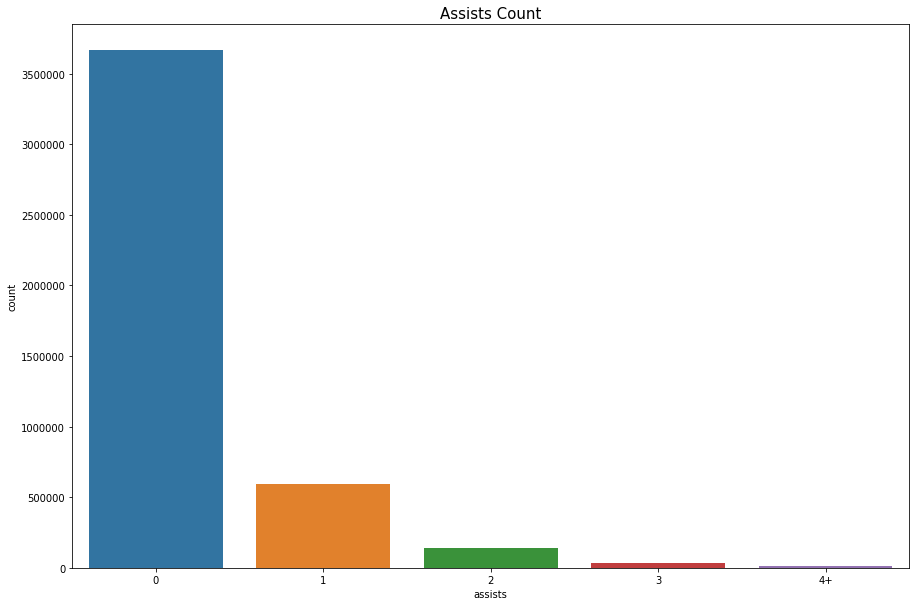

In [12]:
data = df.copy()
data.loc[data['assists'] > data['assists'].quantile(0.99)] = '4+'
plt.figure(figsize=(15,10))
sns.countplot(data['assists'].astype('str').sort_values())
plt.title("Assists Count",fontsize=15)
plt.show()

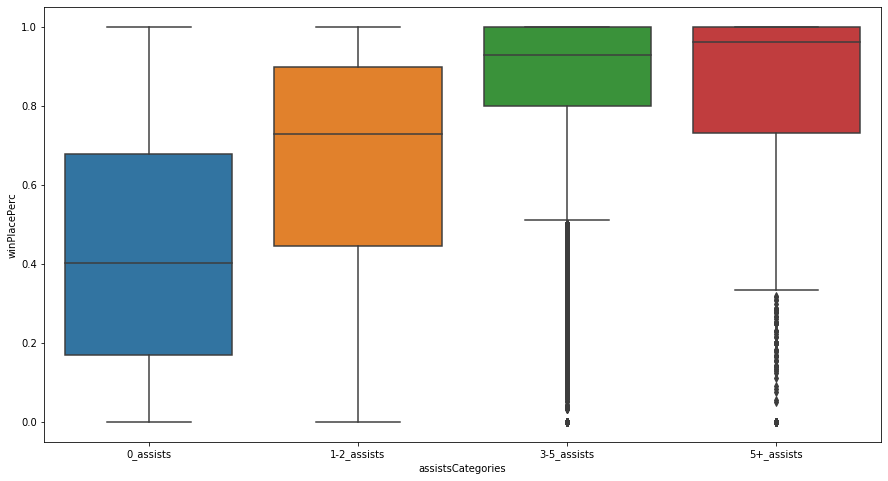

In [13]:
assists = df.copy()

assists['assistsCategories'] = pd.cut(assists['assists'], [-1, 0, 2, 5, 10], labels=['0_assists','1-2_assists', '3-5_assists', '5+_assists'])

plt.figure(figsize=(15,8))
sns.boxplot(x="assistsCategories", y="winPlacePerc", data=assists)
plt.show()

## Distance Travelled : Walk distance, Ride distance

<img src="Images/4.png" alt="drawing" width="800px"/>

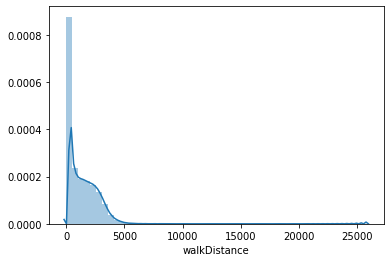

In [14]:
x = df.walkDistance
sns.distplot(x)

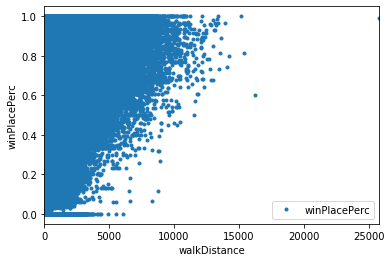

In [15]:
plot = df.plot(x='walkDistance', y='winPlacePerc', style='.')
y_label = plot.set_ylabel('winPlacePerc')

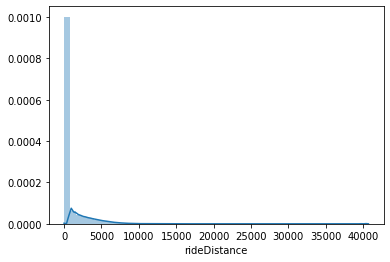

In [16]:
x = df.rideDistance
sns.distplot(x)

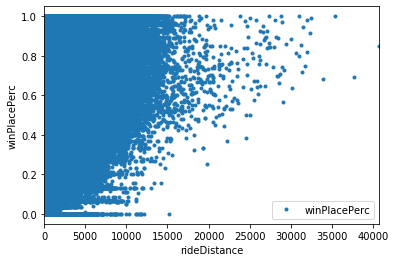

In [17]:
plot = df.plot(x='rideDistance', y='winPlacePerc', style='.')
y_label = plot.set_ylabel('winPlacePerc')

### Heals and Boosts

<img src="Images/5.jpg" alt="drawing" width="800px"/>

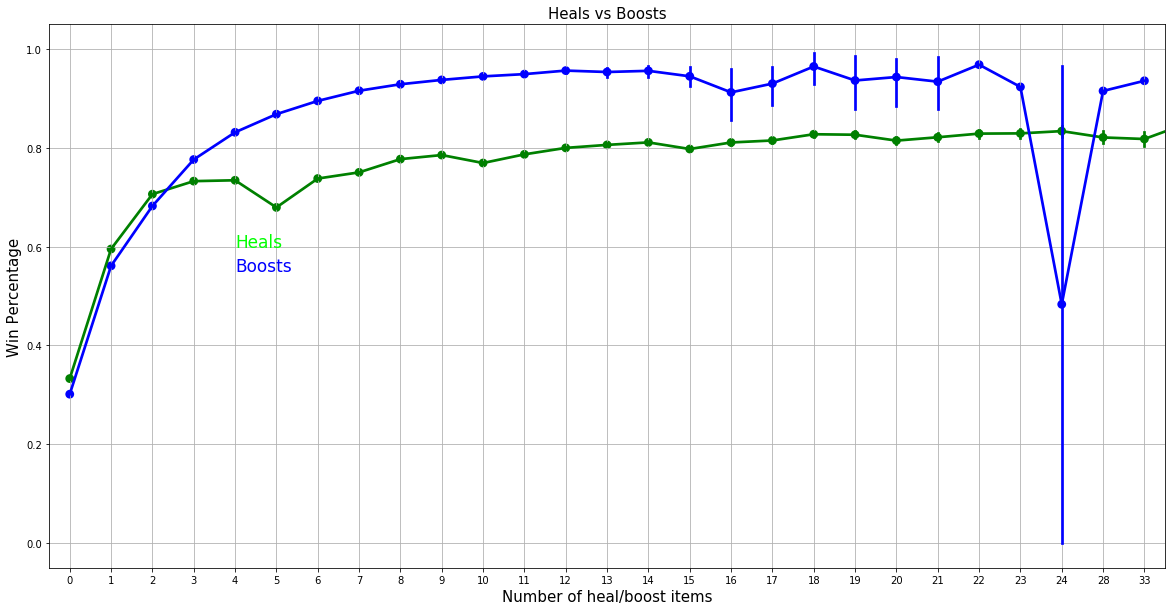

In [18]:
data = df.copy()

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='green',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17)
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17)
plt.xlabel('Number of heal/boost items',fontsize = 15)
plt.ylabel('Win Percentage',fontsize = 15)
plt.title('Heals vs Boosts',fontsize = 15)
plt.grid()
plt.show()

## Weapons Acquired

<img src="Images/7.jpg" alt="drawing" width="800px"/>

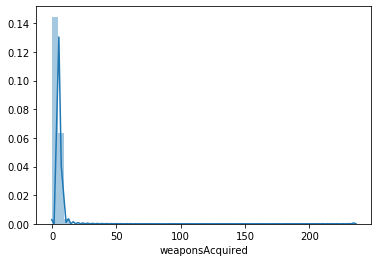

In [19]:
x = df.weaponsAcquired
sns.distplot(x)

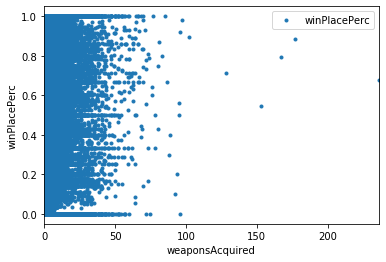

In [20]:
plot = df.plot(x='weaponsAcquired', y='winPlacePerc', style='.')
y_label = plot.set_ylabel('winPlacePerc')

## Correlation Matrix 

<img src="Images/8.png" alt="drawing" width="800px"/>

In [21]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.0390659,0.31969,0.243471,0.261425,-0.0194503,-0.147916,-0.146805,-0.0164068,0.19832,0.110644,0.0119029,0.0233722,0.00608133,0.0579208,0.290305,0.243882,0.0240142,0.299441
boosts,0.307683,1,0.521947,0.358907,0.334661,0.535854,-0.554844,0.00834702,0.502024,0.405327,0.42329,0.0721075,-0.0136863,-0.012929,0.0232018,0.253125,0.328855,0.0351241,0.107993,0.0130678,0.087387,0.64015,0.406609,-0.00764459,0.634234
damageDealt,0.406726,0.521947,1,0.735763,0.613409,0.342987,-0.677398,0.0499038,0.888783,0.703599,0.563837,-0.00675584,-0.0407077,-0.0400785,-0.00145946,0.256951,0.140883,0.0524874,0.0367287,0.0154683,0.0811817,0.398199,0.353248,0.0177617,0.440507
DBNOs,0.301057,0.358907,0.735763,1,0.469923,0.265485,-0.55529,0.0426161,0.707848,0.646872,0.451422,-0.0144863,-0.26771,-0.265789,-0.00345099,0.300999,0.102537,0.0360929,0.0173196,0.0694301,0.06021,0.28466,0.218161,0.0111077,0.27997
headshotKills,0.198289,0.334661,0.613409,0.469923,1,0.199917,-0.469829,0.0239876,0.674275,0.512882,0.447261,-0.0176572,0.00921075,0.00938924,0.00511853,0.150145,0.0764946,0.0133688,0.028531,0.0086581,0.0391998,0.250982,0.217552,0.00498153,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1,-0.386032,-0.00258473,0.311781,0.270412,0.263278,0.108901,-0.064759,-0.064204,0.0191419,0.23668,0.297484,0.0246195,0.0795868,0.0353861,0.0628702,0.430266,0.309071,-0.0109899,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.55529,-0.469829,-0.386032,1,-0.0232778,-0.730499,-0.810517,-0.541146,-0.00580587,0.0167911,0.0187856,-0.0148047,-0.269804,-0.236202,-0.0573561,-0.0893961,-0.037797,-0.0735694,-0.590236,-0.490144,-0.00241537,-0.719069
killPoints,0.0390659,0.00834702,0.0499038,0.0426161,0.0239876,-0.00258473,-0.0232778,1,0.0361919,0.0370914,0.0140838,-0.0995419,-0.0448019,-0.0423668,-0.975555,0.0120405,-0.0293156,-0.0041558,-0.00460407,-0.0397388,-0.00965778,0.00463023,-0.00397816,0.983417,0.0129081
kills,0.31969,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730499,0.0361919,1,0.8025,0.602936,-0.0306877,-0.00484733,-0.00405994,0.00819953,0.253323,0.11475,0.0636507,0.0391274,0.0176008,0.0799908,0.374774,0.336414,0.00692906,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810517,0.0370914,0.8025,1,0.515097,-0.0346448,-0.0373386,-0.0360539,0.00342636,0.241695,0.0984198,0.0655749,0.0345876,0.0276121,0.0643743,0.327639,0.275373,0.00855182,0.377566


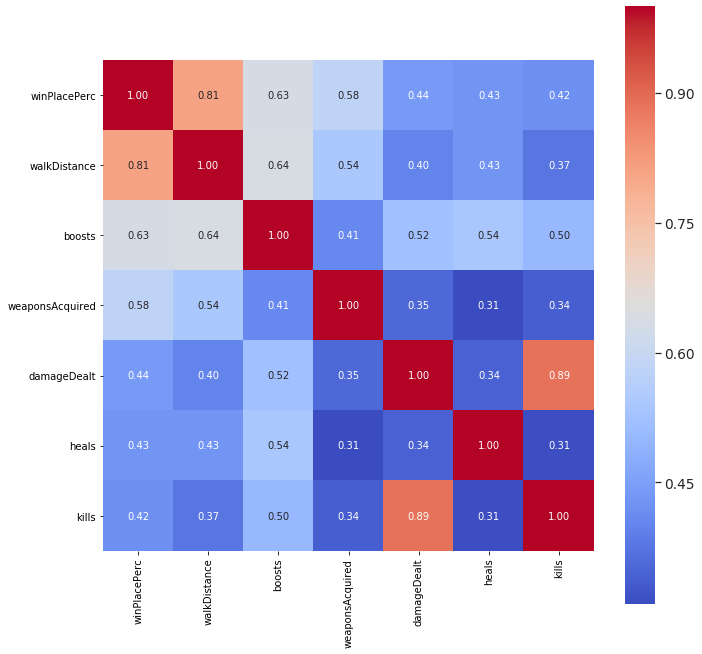

In [22]:
k = 7
f,ax = plt.subplots(figsize=(11, 11))
cols = df.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='coolwarm')
plt.show()

# Feature Engineering

### Creating New Features

In [ ]:
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')
df['healsandboosts'] = df['heals'] + df['boosts']
# df['totaldistance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']
df.describe()

### Normalizing

In [ ]:
df['killsNorm'] = df['kills']*((100-df['playersJoined'])/100 + 1)
df['damageDealtNorm'] = df['damageDealt']*((100-df['playersJoined'])/100 + 1)
df['maxPlaceNorm'] = df['maxPlace']*((100-df['playersJoined'])/100 + 1)
df['matchDurationNorm'] = df['matchDuration']*((100-df['playersJoined'])/100+1)
df['killPlace'] = df['killPlace']*((100 - df['playersJoined'])/100 + 1)

In [ ]:
df['killswithoutmoving'] = ((df['totaldistance']==0) & (df['kills'] > 0))

In [ ]:
print(df[df['killswithoutmoving'] == True].shape)
df.drop(df[df['killswithoutmoving'] == True].index, inplace=True)
print(df[df['kills'] > 40].shape)
print(df[(df['headshotKills']/df['kills'] == 1) & (df['kills'] > 12)].shape)

print(df[(df['totaldistance'] == df['swimDistance'])&(df['winPlacePerc'] > 0.80)].shape)
df.drop(df[(df['totaldistance'] == df['swimDistance'])&(df['winPlacePerc'] > 0.80)].index, inplace=True)
df.drop(df[df['kills'] > 40].index, inplace=True)
df.drop(df[(df['headshotKills']/df['kills'] == 1) & (df['kills'] > 12)].index, inplace=True)

In [ ]:
print(df[df['weaponsAcquired'] > 50].shape)
df.drop(df[df['weaponsAcquired'] > 50].index, inplace=True)
print(df[df['heals'] > 35].shape)
df.drop(df[df['heals'] > 35].index, inplace=True)

In [ ]:
print(df[(df['weaponsAcquired'] > 35) & (df['totaldistance'] == 0)].shape)
df.drop(df[(df['weaponsAcquired'] > 35) & (df['totaldistance'] == 0)].index, inplace=True)

In [ ]:
print(df[(df['weaponsAcquired'] > 30) & (df['totaldistance'] < 50) & (df.kills > 30)].shape)
df.drop(df[(df['weaponsAcquired'] > 30) & (df['totaldistance'] < 50) & (df.kills > 30)].index, inplace=True)

In [ ]:
df[df.longestKill > 950].shape
df.drop(df[df['longestKill'] > 950].index, inplace=True)

# Model 

In [ ]:
columns = ['killsNorm', 'damageDealtNorm', 'matchDurationNorm','healsandboosts', 'DBNOs', 'killPlace','walkDistance', 'winPoints'
          ,'weaponsAcquired', 'killStreaks', 'longestKill', 'teamKills', 'maxPlace', 'assists', 'revives'
          ,'numGroups']

## With PCA

In [ ]:
PCA_X = df.loc[:, columns].values
PCA_y = df.loc[:, ['winPlacePerc']].values

PCA_X = StandardScaler().fit_transform(PCA_X)

pca = PCA(n_components=8)
principal_components = pca.fit_transform(PCA_X)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', '  principal component 6', 'principal component 7', 'principal component 8'])

pca_df = pd.concat([principal_df, df[['winPlacePerc']]], axis = 1)

train_X, val_X, train_y, val_y = train_test_split(PCA_X,PCA_y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)
pred = model.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, pred)))
print(model.score(val_X, val_y))

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(PCA_X,PCA_y, test_size=0.2, random_state=1)
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0, min_samples_leaf=3, max_features='sqrt')
regressor.fit(train_X, train_y)
predict = regressor.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, predict)))
print(regressor.score(val_X, val_y))

## Without PCA

In [ ]:
X = df[columns]
y = df['winPlacePerc']

train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)
pred = model.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, pred)))
print(model.score(val_X, val_y))

In [ ]:
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0, min_samples_leaf=3, max_features='sqrt')
regressor.fit(train_X, train_y)
predict = regressor.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, predict)))
print(regressor.score(val_X, val_y))